Есть две таблицы user_data и logs
Задачи:
1. Какой клиент совершил больше всего успешных операций?
2. С какой платформы осуществляется наибольшее количество успешных операций?
3. Какую платформу предпочитают премиумные клиенты?
4. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
5. Постройте график распределения числа успешных операций
6. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста      совершили наибольшее количество успешных действий?

Описание данных

user_data:
client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст

logs:
client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [1]:
# Импортируем библиотеки и считываем данные
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

users_data = pd.read_csv("/home/jupyter-m-vosorov/shared/homeworks/python_ds_miniprojects/3/user_data.csv")
logs = pd.read_csv("/home/jupyter-m-vosorov/shared/homeworks/python_ds_miniprojects/3/logs.csv")

# Обьединяем таблицы для более удобной работы

users_logs = users_data.merge(logs, on = "client", how = "inner")

In [2]:
# Преобразуем время в более удобный для работы вариант
users_logs.time =(pd.to_datetime(users_logs.time, unit='s'))
users_logs

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,2020-03-29 03:33:59
1,4391,False,55,False,phone,2020-03-28 15:37:41
2,27372,False,64,False,phone,2020-03-29 01:40:18
3,11989,False,44,True,computer,2020-03-28 13:54:58
4,60664,False,49,True,phone,2020-03-28 14:48:38
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,2020-03-28 13:08:22
3435,61579,False,50,True,phone,2020-03-28 22:55:58
3436,61221,True,64,True,phone,2020-03-29 00:03:38
3437,29863,False,46,True,tablet,2020-03-29 00:57:17


In [9]:
# Задача 1: Какой клиент/клиенты совершили больше всего успешных операций?
successful_operations_per_user = users_logs \
    .query("success == 1") \
    .groupby("client", as_index = False) \
    .agg({"success" : "count"}) \
    .sort_values("success", ascending = False) \
    .rename(columns = {"success" : "successful_operations"}) \
    .query("successful_operations == 41") \
    

sorted(successful_operations_per_user["client"].unique())

# Идентификаторы пользователей с наибольшим количеством успешных операци

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [4]:
# Задача 2: С какой платформы осуществляется наибольшее количество успешных операций? 
users_logs \
    .platform.value_counts().reset_index() \
    .rename(columns = {"platform" : "number_of_operations", "index" : "platform"}) \
    .sort_values("number_of_operations", ascending = False)
# Как мы видим больше всего пользователей совершили успешные операции использую платформу phone

,platform,number_of_operations
0,phone,2117
1,computer,1140
2,tablet,182


In [10]:
# Задача 3: Какую платформу предпочитают премиумные клиенты?
users_logs \
    .query("premium == True") \
    .platform.value_counts().reset_index() \
    .rename(columns = {"platform" : "number_of_operations", "index" : "platform"}) \
    .sort_values("number_of_operations", ascending = False)
#  Как мы видим больше всего премиумных пользователей совершили успешные операции использую платформу phone

,platform,number_of_operations
0,phone,246
1,computer,150
2,tablet,24


[Text(0, 0.5, 'Плотность распределения'), Text(0.5, 0, 'Возраст')]

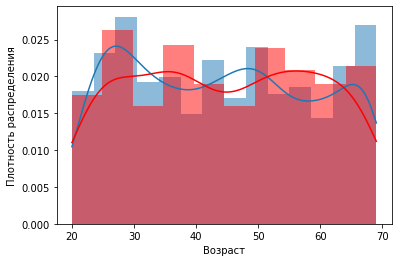

In [23]:
# Задача 4: Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
sns.histplot(users_logs.query("premium == False").age, kde=True, stat="density", linewidth=0).set(xlabel='Возраст', ylabel='Плотность распределения')
sns.histplot(users_logs.query("premium == True").age, kde=True, stat="density", linewidth=0, color = "red").set(xlabel='Возраст', ylabel='Плотность распределения')

# На этом графике синяя линия и столбцы отвечают за непремиумных пользователей, а красная линия и столбцы - за премиумных

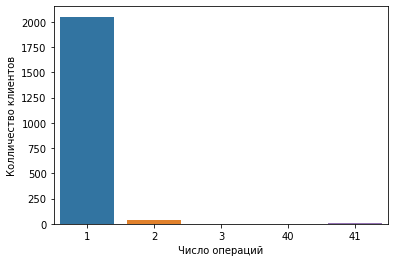

In [31]:
# Задача 5: Постройте график распределения числа успешных операций 
# x – число успешных операций
# y – число клиентов, совершивших столько успешных операций

operations_per_numbers_of_clients = users_logs \
                                        .query("success == True") \
                                        .groupby("client", as_index = False) \
                                        .agg({"success" : "count"}) \
                                        .groupby("success") \
                                        .agg({"client" : "count"}) \
                                        .reset_index() \
                                        .rename(columns = {"success" : "Число операций", "client" : "Колличество клиентов"})
sns.barplot(data = operations_per_numbers_of_clients, x = "Число операций", y = "Колличество клиентов")
# Как мы видим бóльшая часть наблюдений сосредоточена в левой части графика, отсюда можно сделать вывод что большинство пользо -
# вателей испольют продукт лишь единожды

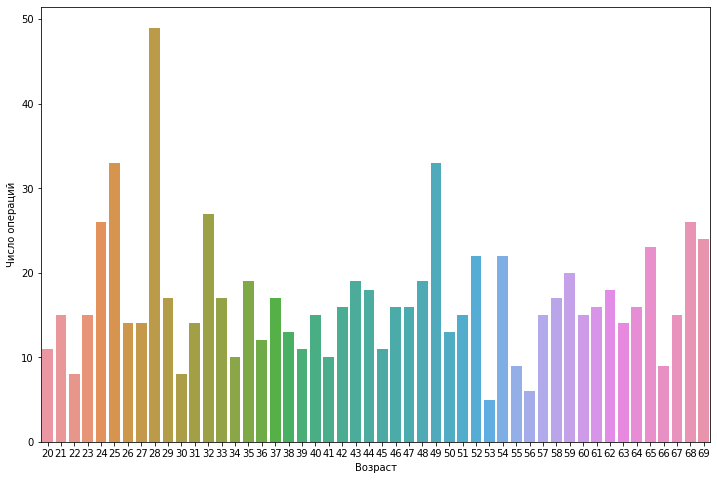

In [42]:
# Задача 6: Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. 
#           Клиенты какого возраста совершили наибольшее количество успешных действий?
plt.figure(figsize=(12, 8))
computer_platform_per_age = users_logs \
                                .query("platform == 'computer' and success == True") \
                                .groupby("age", as_index = False) \
                                .agg({"platform" : "count"}) \
                                .rename(columns = {"age" : "Возраст", "platform" : "Число операций"})
sns.barplot(data = computer_platform_per_age, x = "Возраст", y = "Число операций")